In [1]:
# 导入 TensorFlow 和 tf.keras
import tensorflow as tf
from tensorflow import keras
#导入帮助库
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.0.0'

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [5]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

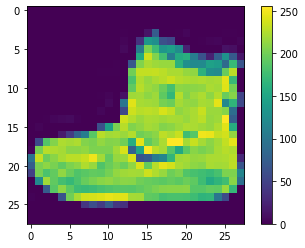

In [6]:
# 预览第一张图片
plt.figure()
plt.imshow(train_images[0])
plt.colorbar() # 显示颜色条
plt.grid(False)
plt.show()

In [8]:
# 把训练集和测试集的值缩放到 0~1之间
train_images = train_images / 255.0
test_images = test_images / 255.0

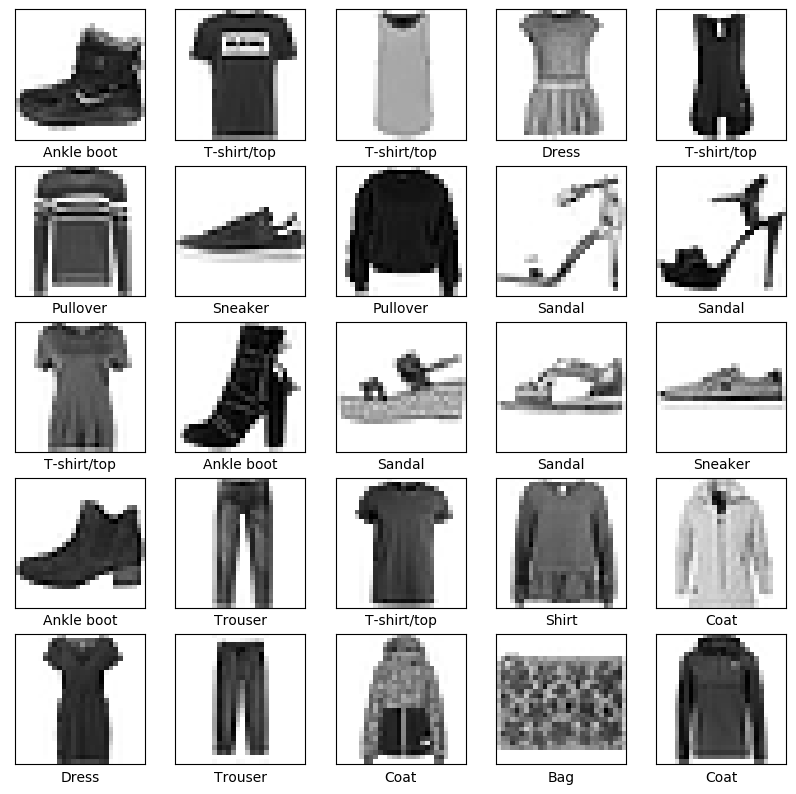

In [28]:
# 为了验证即将要进行网络训练的数据是正确的格式，我们将训练集中的前25个图片展示出来
# 并且在每张图片下显示对应的类名

# 完整画板的大小,单位为inches（1英寸=2.54厘米)
# dpi（dots per inch 每英寸点数）
# TODO: 如何对应屏幕显示的像素
plt.figure(figsize=(10, 10), dpi=100) 
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([]) # 不显示横坐标
    plt.yticks([]) # 不显示纵坐标
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [32]:
# 构建模型
model = keras.Sequential([
    # 扁平化数据（28， 28） =》 (28 * 28, )
    keras.layers.Flatten(input_shape=(28, 28)),
    # 隐藏层
    keras.layers.Dense(128, activation=keras.activations.relu),
    # 输出层
    keras.layers.Dense(10, activation=keras.activations.softmax)
])
# 查看模型结构
model.summary()
# 编译模型
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [35]:
# 训练模型
history = model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2332 - accuracy: 0.9132
Epoch 2/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2255 - accuracy: 0.9160
Epoch 3/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2186 - accuracy: 0.9186
Epoch 4/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2136 - accuracy: 0.9216
Epoch 5/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2073 - accuracy: 0.9224
Epoch 6/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2007 - accuracy: 0.9246
Epoch 7/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1950 - accuracy: 0.9262
Epoch 8/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1892 - accuracy: 0.9297
Epoch 9/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1859 - accuracy: 0.9303
Epoch 10/10
60

In [34]:
# 评估准确率
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

'''
结论：
对测试集的预测值的准确率为0.8857, 对训练集的则为0.9103，属于过拟合(overfitting)
'''

10000/1 - 0s - loss: 0.2061 - accuracy: 0.8857


In [37]:
# 进行预测
predictions = model.predict(test_images)

In [43]:
np.argmax(predictions[0]), test_labels[0]

(9, 9)

In [61]:
# 绘制图像来显示对这10种类型的预测结果
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicated_label = np.argmax(predictions_array)
    
    color = 'blue' if predicated_label == true_label else 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicated_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]
                                        ),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicated_label = np.argmax(predictions_array)
    
    thisplot[predicated_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

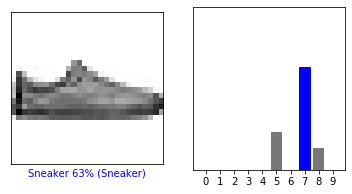

In [64]:
i = 12
plt.figure(figsize=(6, 3))
# subplot(nrows, ncols, index, **kwargs)  
# index starts at 1 in the upper left corner and increases to the right.
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


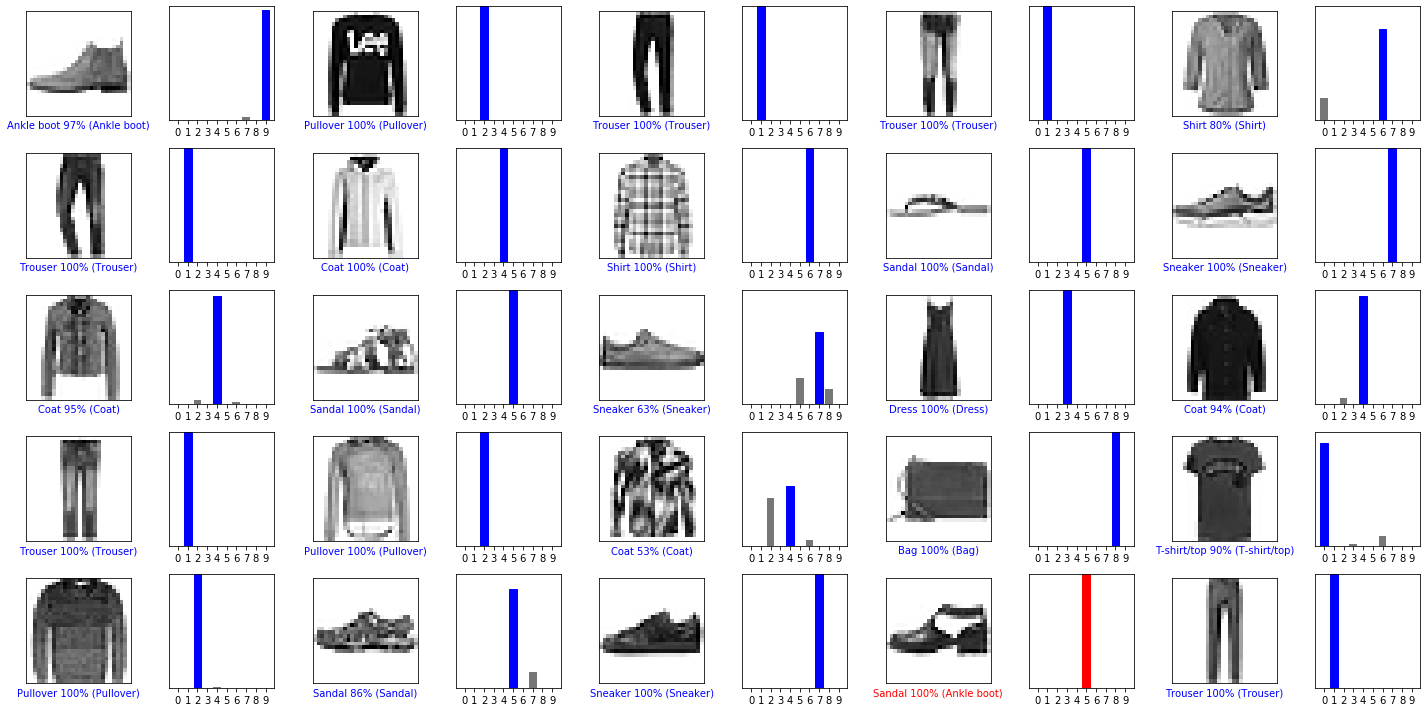

In [66]:
# 绘制测试集中的预测结果
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [69]:
# tf.keras是为了执行批量预测做的优化，因此即使只是对单张图片进行预测
# 也要先把单张图片数据添加到一个list中
img = test_images[1]
print(img.shape)
# 添加维度
img = np.expand_dims(img, 0)
print(img.shape)

(28, 28)
(1, 28, 28)


[[1.3842390e-04 8.9635070e-16 9.9956638e-01 3.3335474e-13 2.6049110e-04
  2.3645500e-18 3.4636781e-05 4.8253142e-24 5.2924462e-14 1.4975586e-23]] Pullover


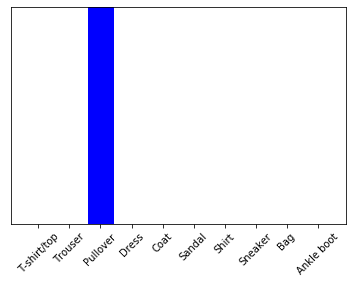

In [82]:
# 执行单张预测
predictions_single = model.predict(img)
print(predictions_single, class_names[np.argmax(predictions_single)])
# 绘制预测图
plot_value_array(1, predictions_single[0], test_labels)
# 修改x轴显示
_ = plt.xticks(range(10), class_names, rotation=45)